## Programming for Data Analytics Project
### Contact Centre Key Performance Indicators

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from IPython.display import Image

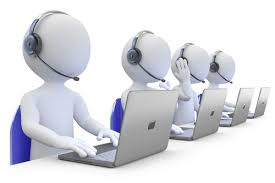

In [12]:
Image("Callpic.jpg") #load call centre image

### Contact Center
Contact centers offer omnichannel customer support for a nuber of different services including email, chat, voice over IP (VoIP) and website support. In this notebook, random data is generated to simulate key performance indicators (KPI's) associated with monthly incoming voice and data (email) communication. A key performance indicator is a measurable value that shows how effective an organisation is in achieving key business objectives. Simulated contact center communication data for this notebook is generated via the numpy random.poisson distribution. The Poisson distribution, named after French mathematician S. D. Poisson, is a statistical distribution showing the likely number of times that an event will occur within a specified period of time. (1)



### KPIs

#### Average Time in Queue 
In order to ensure a customer's wait time is within an acceptable range  you must keep track of average time in queue. This KPI is the total time callers wait in call queues divided by the total number of calls answered by agents. It is a great indicator of whether or not your team is providing their callers with the service they deserve.(2) From my research, I have found that this measure is closely related to customer satisfaction. In everyday business, no customer likes to wait for a long time to buy groceries or to order food. Customers are unlikely to return if they leave without being served. This logic also applies to contact canter customers. Average waiting time must be kept to a minimum in order to achieve customer satisfaction targets. The poisson random number has been set at 15 seconds for the purpose of this exercise, which generates data typical of contact centers.

#### Abandoned Calls
This is the number of callers that hang up before an agent answers. I have centered the generation of the random poisson number at 320. This number will be used in calculation of the Abandonment rate and should give a higher than average result.

#### Abandonment Rate
Call abandonment is the percentage of callers who hang up before reaching an agent. This is a common occurrence in the call center and has a detrimental impact on customer retention. It is very important to keep track of this KPI and make sure that it remains within objective.(2)  The global metric for Abandonment Rate in the call center is between 5 – 8%. The metric is calculated by dividing the number of Abandoned Calls by the Total Incoming call number. 

#### Service Level
Service level is the percentage of calls answered within a specified timeframe. The global metric for Service Level in call centers is 80% of calls answered within 20 seconds. I have simulated a seervice level of between 50% - 84% in this notebook by setting random.poisson to 65. 



#### Average Speed of Answer
The average speed of answer is the average time it takes for calls to be answered in the call center during a specific time frame. It is an important metric when measuring a team's efficiency.(2)

#### Average Handle Time
Average handle time is the elapsed time from when an agent answers a call until the agent disconnects. It is one of the most commonly analyzed KPIs in the call center industry as it is directly related to caller satisfaction.(2)

#### emails/ Availability/ Number of Agents
The number of emails, agent availability and number of agents values have been randomly chosen.

#### Occupancy Rate
Occupancy rate measures the amount of time agents are on live calls as well as completing work associated with the calls.(2)

#### First Call Resolution
First call resolution FCR measures the percentage of customer calls that are resolved the first time. Calculation:- Number of FCR calls / Total Number of Calls

#### Customer Satisfaction
Customer satisfaction is a KPI that can be acquired from many different sources. This cn be done by conducting a customer satisfaction survey, as well as collating data from a number of different quality assurance measurements. 

Contact centers typically arrive at a customer satisfaction score by conducting customer surveys as well as obtaining quality assurance measurements.(2)


In one survey, businesses reported that they lost 75% of customers due to waiting times. And when a customer leaves the door with nothing in their hands but frustration, they’re unlikely to ever come back.


In [161]:
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,SpdAns,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2006-01-31,3597,9,292,8.117876,59,68,11,494,209,358,58.0,49,67
2006-02-28,3633,10,314,8.642995,68,78,15,529,268,328,82.0,50,66
2006-03-31,3624,14,338,9.326711,63,68,17,515,234,365,64.0,53,62
2006-04-30,3598,8,325,9.032796,62,59,18,516,235,334,70.0,53,66
2006-05-31,3692,14,302,8.179848,71,57,19,509,251,386,65.0,44,60


#### Simulate date
Date column data is simulated using Pandas function date_range, with a monthly frequency and 150 periods.

In [114]:
rng = pd.date_range('1/1/2006', periods = 150, freq = 'M')
rng

DatetimeIndex(['2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31',
               ...
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30'],
              dtype='datetime64[ns]', length=150, freq='M')

#### Generate Call Center data 
Data for call center is generated from the Numpy ramdom poisson distribution. Dates from rng are used as index values. 

In [165]:
Calls = pd.DataFrame(np.random.poisson(3617, len(rng)), index=rng, columns = ["Calls"])
Calls["Avg_Q"] = pd.DataFrame.assign(np.random.poisson(15, len(rng)))
Calls["Aband"] = pd.DataFrame.assign(np.random.poisson(320, len(rng)))
Calls["Aband_Rate"] = pd.DataFrame.assign((Calls.Aband / Calls.Calls)*100)
Calls["ServLev"] = pd.DataFrame.assign(np.random.poisson(65, len(rng)))
Calls["SpdAns"] = pd.DataFrame.assign(np.random.poisson(65, len(rng)))
Calls["AvgHand"] = pd.DataFrame.assign(np.random.poisson(15, len(rng)))
Calls["eMails"] = pd.DataFrame.assign(np.random.poisson(500, len(rng)))
Calls["NumAgent"] = pd.DataFrame.assign(np.random.poisson(241, len(rng)))
Calls["Avail"] = pd.DataFrame.assign(np.random.poisson(347, len(rng)))
Calls["Ocup%"] = pd.DataFrame.assign((Calls.NumAgent / Calls.Avail)*100)
Calls["Ocup%"] = Calls["Ocup%"].apply(np.round)
Calls["Fcr%"] =  pd.DataFrame.assign(np.random.poisson(50, len(rng)))
Calls["Sfact"] =  pd.DataFrame.assign(np.random.poisson(70, len(rng)))
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,SpdAns,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2006-01-31,3605,21,324,8.987517,67,53,9,493,250,350,71.0,51,65
2006-02-28,3682,15,292,7.930473,70,84,11,475,224,333,67.0,53,77
2006-03-31,3542,15,315,8.893281,55,56,11,472,223,339,66.0,50,86
2006-04-30,3673,14,332,9.038933,54,58,26,494,269,301,89.0,55,69
2006-05-31,3455,10,310,8.972504,70,67,16,474,261,364,72.0,52,77


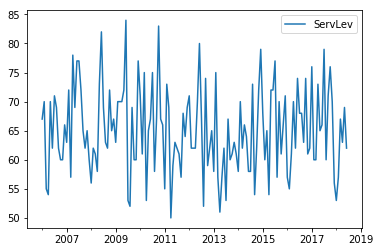

In [166]:
#Calls.iloc[100:140].plot(y=['Sfact','Aband'], use_index=True)
Calls.plot(y=['ServLev'], use_index=True)

In [167]:
Calls.mean().astype(int)

Calls         3614
Avg_Q           14
Aband          320
Aband_Rate       8
ServLev         65
SpdAns          64
AvgHand         14
eMails         500
NumAgent       240
Avail          347
Ocup%           69
Fcr%            49
Sfact           70
dtype: int32

In [168]:
Calls.describe().astype(int)

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,SpdAns,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
count,150,150,150,150,150,150,150,150,150,150,150,150,150
mean,3614,14,320,8,65,64,14,500,240,347,69,49,70
std,62,3,16,0,7,8,4,23,16,17,6,6,8
min,3455,7,271,7,50,45,5,438,186,298,55,27,49
25%,3574,12,310,8,60,58,12,483,229,337,65,46,64
50%,3615,15,320,8,65,65,14,498,239,347,69,50,71
75%,3658,17,331,9,70,69,18,517,251,358,74,54,76
max,3753,25,364,10,84,90,26,548,275,390,89,65,92


In [118]:
Calls.loc['2017-11-30':'2018-05-31']

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,Fcr%,Sfact
2017-11-30,3603,14,44,58,70,13,491,378,258,68.0,62,73
2017-12-31,3631,8,57,59,69,15,482,313,210,67.0,59,80
2018-01-31,3603,16,55,65,69,15,491,387,235,61.0,53,68
2018-02-28,3662,15,43,62,65,13,549,343,234,68.0,55,69
2018-03-31,3705,21,55,66,58,14,509,335,232,69.0,46,71
2018-04-30,3564,15,51,61,67,17,501,299,249,83.0,44,79
2018-05-31,3654,19,57,79,68,11,520,362,239,66.0,45,69


In [119]:
Calls.loc['2017-11-30':'2018-05-31'].mean().astype(int)

Calls       3631
Avg_Q         15
Aband         51
ServLev       64
SpdAns        66
AvgHand       14
eMails       506
Avail        345
NumAgent     236
Ocup%         68
Fcr%          52
Sfact         72
dtype: int32

In [120]:
Calls.resample('Y').mean().astype(int)

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,Fcr%,Sfact
2006-12-31,3625,13,52,63,62,15,491,342,245,71,49,67
2007-12-31,3626,14,44,65,64,14,486,341,239,70,50,67
2008-12-31,3622,12,51,64,64,14,494,343,241,70,48,67
2009-12-31,3584,15,48,65,63,16,504,353,238,67,47,69
2010-12-31,3588,16,48,65,64,16,499,342,242,71,51,69
2011-12-31,3607,14,48,63,60,13,511,350,242,69,46,65
2012-12-31,3582,13,49,65,66,13,505,348,236,68,52,69
2013-12-31,3602,16,48,62,69,15,506,352,230,65,52,65
2014-12-31,3599,16,52,65,64,13,489,347,234,67,53,66
2015-12-31,3590,15,47,65,62,13,499,348,233,67,53,71


In [121]:
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,Fcr%,Sfact
2006-01-31,3632,12,57,63,69,21,486,327,262,80.0,51,82
2006-02-28,3615,13,53,47,54,15,506,342,275,80.0,53,59
2006-03-31,3563,10,43,61,56,14,497,368,238,65.0,47,62
2006-04-30,3603,11,51,68,58,15,511,345,223,65.0,42,84
2006-05-31,3689,14,51,73,59,12,466,341,258,76.0,31,72


In [122]:
Temp = Calls.loc[Calls['Avg_Q'] <= 22]
Temp.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,Fcr%,Sfact
2006-01-31,3632,12,57,63,69,21,486,327,262,80.0,51,82
2006-02-28,3615,13,53,47,54,15,506,342,275,80.0,53,59
2006-03-31,3563,10,43,61,56,14,497,368,238,65.0,47,62
2006-04-30,3603,11,51,68,58,15,511,345,223,65.0,42,84
2006-05-31,3689,14,51,73,59,12,466,341,258,76.0,31,72


### Greater or equal to !!!  Really GOOD!!!!!!!

In [123]:
Calls.loc[Calls.Aband <= 50, 'Aband50?'] = 'True' 
Calls.loc[Calls.Aband > 50, 'Aband50?'] = 'False' 
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,Fcr%,Sfact,Aband50?
2006-01-31,3632,12,57,63,69,21,486,327,262,80.0,51,82,False
2006-02-28,3615,13,53,47,54,15,506,342,275,80.0,53,59,False
2006-03-31,3563,10,43,61,56,14,497,368,238,65.0,47,62,True
2006-04-30,3603,11,51,68,58,15,511,345,223,65.0,42,84,False
2006-05-31,3689,14,51,73,59,12,466,341,258,76.0,31,72,False


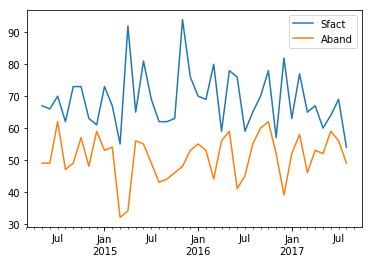

In [124]:
Calls.iloc[100:140].plot(y=['Sfact','Aband'], use_index=True)

In [125]:
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,Fcr%,Sfact,Aband50?
2006-01-31,3632,12,57,63,69,21,486,327,262,80.0,51,82,False
2006-02-28,3615,13,53,47,54,15,506,342,275,80.0,53,59,False
2006-03-31,3563,10,43,61,56,14,497,368,238,65.0,47,62,True
2006-04-30,3603,11,51,68,58,15,511,345,223,65.0,42,84,False
2006-05-31,3689,14,51,73,59,12,466,341,258,76.0,31,72,False


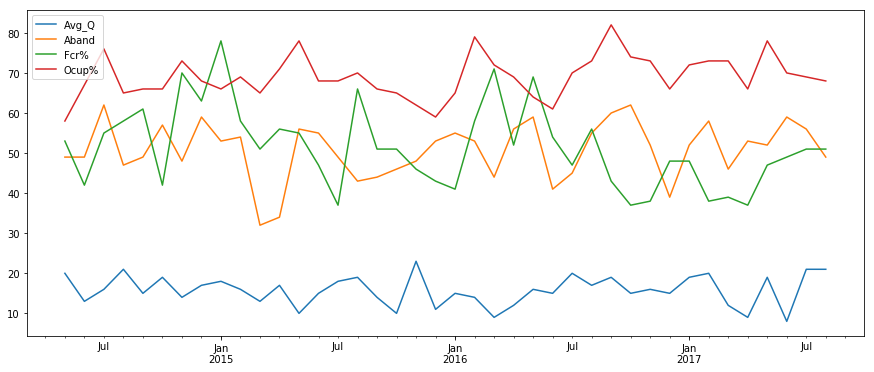

In [126]:
#Calls.plot(y=['Avg_Wait','Aband', 'ServLev', 'SpdAns', 'Ocup %', 'Sfact'], use_index=True)
Calls.iloc[100:140].plot(y=['Avg_Q','Aband', 'Fcr%', 'Ocup%'], use_index=True, figsize=(15,6))

### True/False Hue really good for SLA.......

In [127]:
#Calls.loc[Calls.Sfact <= 75, 'Cust Satisfied?'] = 'True' 
#Calls.loc[Calls.Sfact > 75, 'Cust Satisfied?'] = 'False' 
#Calls.head()

In [128]:
Calls1 = Calls.loc[:, 'eMails':'Ocup%']
Calls1.head()

,eMails,Avail,NumAgent,Ocup%
2006-01-31,486,327,262,80.0
2006-02-28,506,342,275,80.0
2006-03-31,497,368,238,65.0
2006-04-30,511,345,223,65.0
2006-05-31,466,341,258,76.0


In [129]:
df= Calls.loc[:, ['Calls', 'Aband']]
df.head()

,Calls,Aband
2006-01-31,3632,57
2006-02-28,3615,53
2006-03-31,3563,43
2006-04-30,3603,51
2006-05-31,3689,51


### Customer Satisfaction !!!!!!!!!!!!

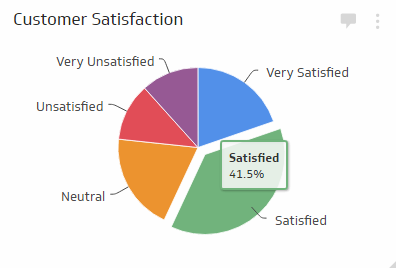

In [130]:
Image("CustSatisf.png")

In [131]:
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,Fcr%,Sfact,Aband50?
2006-01-31,3632,12,57,63,69,21,486,327,262,80.0,51,82,False
2006-02-28,3615,13,53,47,54,15,506,342,275,80.0,53,59,False
2006-03-31,3563,10,43,61,56,14,497,368,238,65.0,47,62,True
2006-04-30,3603,11,51,68,58,15,511,345,223,65.0,42,84,False
2006-05-31,3689,14,51,73,59,12,466,341,258,76.0,31,72,False


In [132]:
Calls.loc[Calls.Sfact >= 80, 'Cust_Rating'] = 'Very Satisfied' 
Calls.loc[Calls.Sfact < 80, 'Cust_Rating'] ='Satisfied'
Calls.loc[Calls.Sfact < 75, 'Cust_Rating'] = 'Neutral' 
Calls.loc[Calls.Sfact < 70, 'Cust_Rating'] = 'Unsatisfied' 
Calls.loc[Calls.Sfact < 60, 'Cust_Rating'] = 'Vey Unsatisfied' 
Calls.head()

,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,Fcr%,Sfact,Aband50?,Cust_Rating
2006-01-31,3632,12,57,63,69,21,486,327,262,80.0,51,82,False,Very Satisfied
2006-02-28,3615,13,53,47,54,15,506,342,275,80.0,53,59,False,Vey Unsatisfied
2006-03-31,3563,10,43,61,56,14,497,368,238,65.0,47,62,True,Unsatisfied
2006-04-30,3603,11,51,68,58,15,511,345,223,65.0,42,84,False,Very Satisfied
2006-05-31,3689,14,51,73,59,12,466,341,258,76.0,31,72,False,Neutral


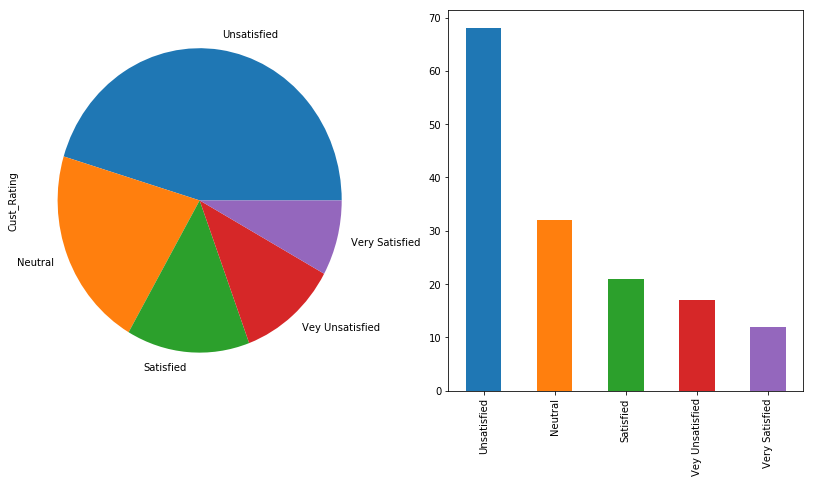

In [133]:
df4 = Calls['Cust_Rating'].value_counts()
plt.subplot(1,2,1)
df4.plot.pie(figsize=(14,7));

plt.subplot(1,2,2)
df4.plot.bar(figsize=(14,7));

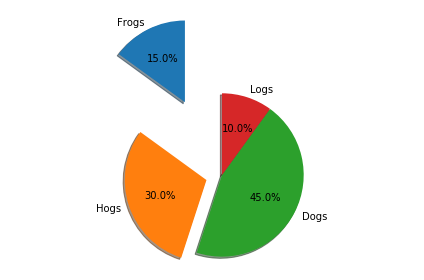

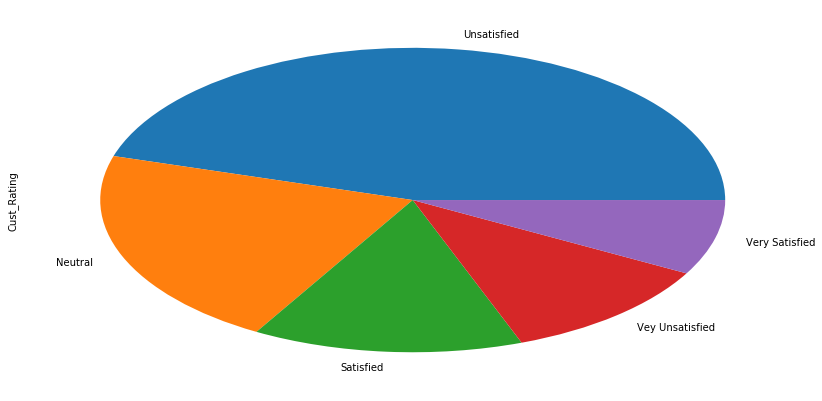

In [134]:
# Pie chart
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (1, 0.2, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

df4 = Calls['Cust_Rating'].value_counts()
explode = (1, 0.2, 0, 0)  
df4.plot.pie(figsize=(14,7));

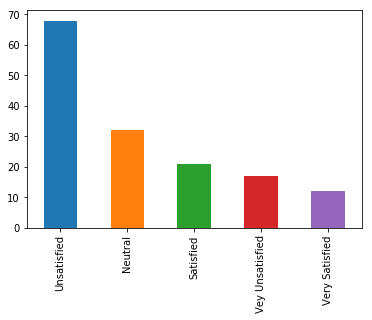

In [135]:
df4.plot.bar();

In [136]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
plt.show()

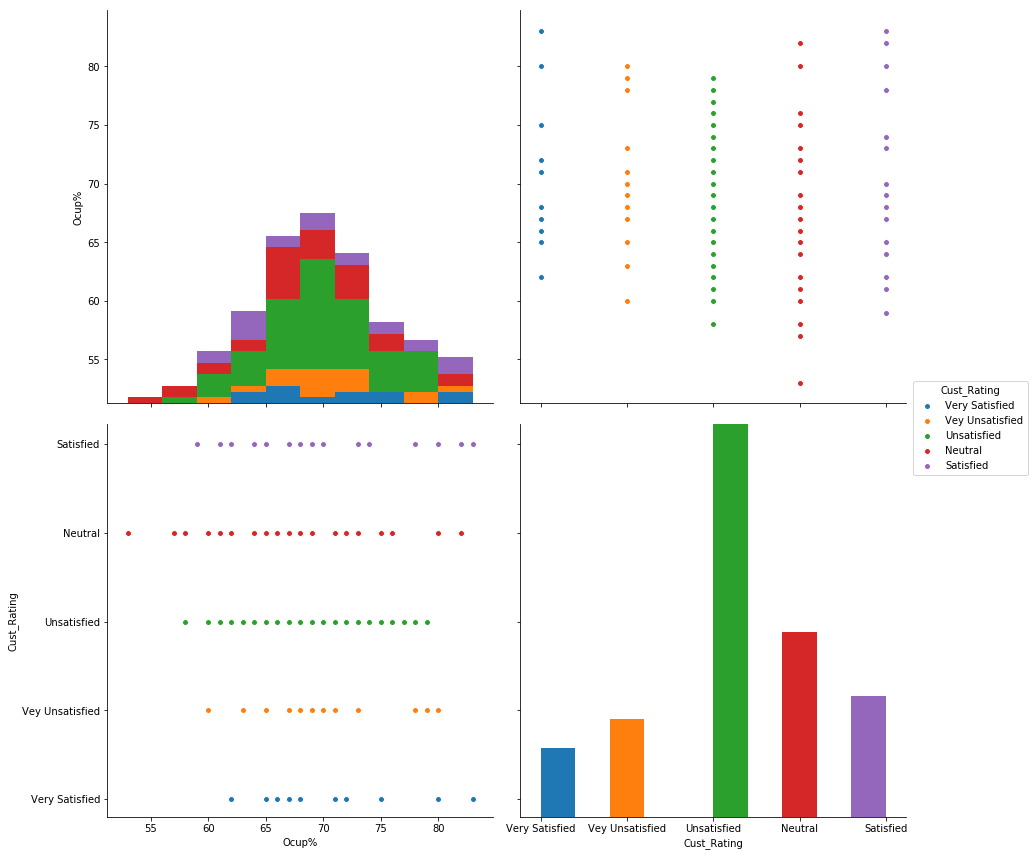

In [137]:
import seaborn as sns
sns.pairplot(Calls, hue='Cust_Rating', vars=['Ocup%', 'Cust_Rating'], size = 6)

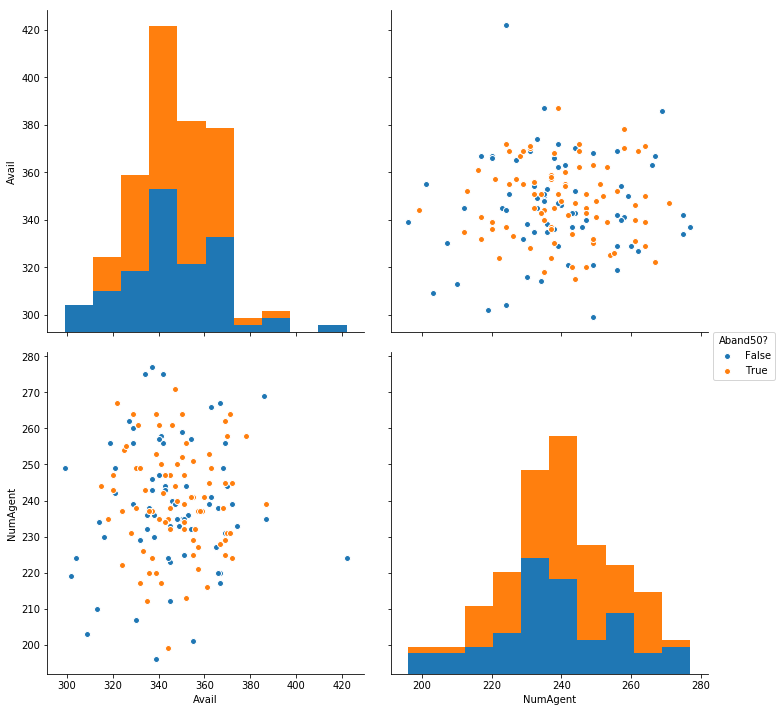

In [138]:
import seaborn as sns
sns.pairplot(Calls, hue='Aband50?', vars=['Avail', 'NumAgent'], size = 5)

### Vertical Count Plot

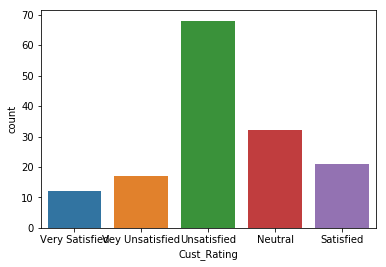

In [139]:
from seaborn import countplot
from matplotlib.pyplot import figure, show


figure()
countplot(data=Calls,x='Cust_Rating')
show()

### Horizontal Count Plot

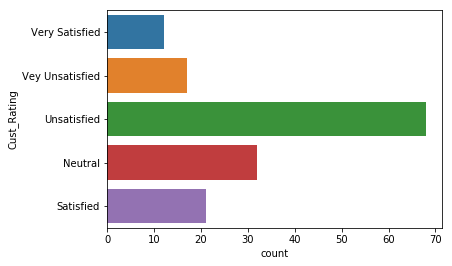

In [140]:
figure()
countplot(data=Calls,y='Cust_Rating')
show()

In [141]:
Calls.head()


,Calls,Avg_Q,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup%,Fcr%,Sfact,Aband50?,Cust_Rating
2006-01-31,3632,12,57,63,69,21,486,327,262,80.0,51,82,False,Very Satisfied
2006-02-28,3615,13,53,47,54,15,506,342,275,80.0,53,59,False,Vey Unsatisfied
2006-03-31,3563,10,43,61,56,14,497,368,238,65.0,47,62,True,Unsatisfied
2006-04-30,3603,11,51,68,58,15,511,345,223,65.0,42,84,False,Very Satisfied
2006-05-31,3689,14,51,73,59,12,466,341,258,76.0,31,72,False,Neutral


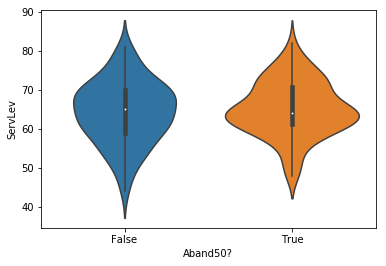

In [142]:
sns.violinplot(x='Aband50?', y='ServLev', data=Calls)

1. Poisson distribution https://www.investopedia.com/terms/p/poisson-distribution.asp
2. Average Time in Queue  https://www.talkdesk.com/blog/12-call-center-kpis-to-track-for-success/